# PY-Bank

## Importações de Bibliotecas e DataFrame

In [338]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, train_test_split, learning_curve


In [339]:
data = pd.read_csv('data_root/adult.csv')
data

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [340]:
# foi mantido a coluna education e education-num, pois vamos utilizar uma para KNN e a outra para RandomForest
data = data[['age','workclass','education','educational-num','occupation','relationship','race','gender','hours-per-week','native-country','income']]
data

age     workclass     education  educational-num         occupation  \
0       25       Private          11th                7  Machine-op-inspct   
1       38       Private       HS-grad                9    Farming-fishing   
2       28     Local-gov    Assoc-acdm               12    Protective-serv   
3       44       Private  Some-college               10  Machine-op-inspct   
4       18             ?  Some-college               10                  ?   
...    ...           ...           ...              ...                ...   
48837   27       Private    Assoc-acdm               12       Tech-support   
48838   40       Private       HS-grad                9  Machine-op-inspct   
48839   58       Private       HS-grad                9       Adm-clerical   
48840   22       Private       HS-grad                9       Adm-clerical   
48841   52  Self-emp-inc       HS-grad                9    Exec-managerial   

      relationship   race  gender  hours-per-week native-country income  
0        Own-child  Black    Male              40  United-States  <=50K  
1          Husband  White    Male              50  United-States  <=50K  
2          Husband  White    Male              40  United-States   >50K  
3          Husband  Black    Male              40  United-States   >50K  
4        Own-child  White  Female              30  United-States  <=50K  
...            ...    ...     ...             ...            ...    ...  
48837         Wife  White  Female              38  United-States  <=50K  
48838      Husband  White    Male              40  United-States   >50K  
48839    Unmarried  White  Female              40  United-States  <=50K  
48840    Own-child  White    Male              20  United-States  <=50K  
48841         Wife  White  Female              40  United-States   >50K  

[48842 rows x 11 columns]

## Análise Exploratória

In [341]:
data.describe()

age  educational-num  hours-per-week
count  48842.000000     48842.000000    48842.000000
mean      38.643585        10.078089       40.422382
std       13.710510         2.570973       12.391444
min       17.000000         1.000000        1.000000
25%       28.000000         9.000000       40.000000
50%       37.000000        10.000000       40.000000
75%       48.000000        12.000000       45.000000
max       90.000000        16.000000       99.000000

In [342]:
# idade estatísticas media, mediana e desvio padrão
idade = data['age']
print(f'A media é [{idade.mean()}], a mediana é [{idade.median()}] e o desvio padrão é [{idade.std()}]')

A media é [38.64358543876172], a mediana é [37.0] e o desvio padrão é [13.710509934443557]


In [343]:
# tempo de trabalho estatísticas media, mediana e desvio padrão
tempo_de_trabalho = data['hours-per-week']
print(f'A media é [{tempo_de_trabalho.mean()}], a mediana é [{tempo_de_trabalho.median()}] e o desvio padrão é [{tempo_de_trabalho.std()}]')

A media é [40.422382375824085], a mediana é [40.0] e o desvio padrão é [12.391444024252307]


In [344]:
# valor escolar estatísticas media, mediana e desvio padrão
educ_num = data['educational-num']
print(f'A media é [{educ_num.mean()}], a mediana é [{educ_num.median()}] e o desvio padrão é [{educ_num.std()}]')

A media é [10.078088530363212], a mediana é [10.0] e o desvio padrão é [2.5709727555922566]


In [345]:
# Educação e idade correlação - A correlação não é significativa, ou seja, não faz muita diferença a educação com a idade do individuo (antes do tratamento dos dados)

educacao = data['educational-num']
educacao.corr(idade)

np.float64(0.030940375874514)

In [346]:
# foi mantido a coluna education e education-num, pois vamos utilizar uma para KNN e a outra para RandomForestdata = data[['age','workclass','education','educational-num','occupation','relationship','race','gender','hours-per-week','native-country','income']]
data

age     workclass     education  educational-num         occupation  \
0       25       Private          11th                7  Machine-op-inspct   
1       38       Private       HS-grad                9    Farming-fishing   
2       28     Local-gov    Assoc-acdm               12    Protective-serv   
3       44       Private  Some-college               10  Machine-op-inspct   
4       18             ?  Some-college               10                  ?   
...    ...           ...           ...              ...                ...   
48837   27       Private    Assoc-acdm               12       Tech-support   
48838   40       Private       HS-grad                9  Machine-op-inspct   
48839   58       Private       HS-grad                9       Adm-clerical   
48840   22       Private       HS-grad                9       Adm-clerical   
48841   52  Self-emp-inc       HS-grad                9    Exec-managerial   

      relationship   race  gender  hours-per-week native-country income  
0        Own-child  Black    Male              40  United-States  <=50K  
1          Husband  White    Male              50  United-States  <=50K  
2          Husband  White    Male              40  United-States   >50K  
3          Husband  Black    Male              40  United-States   >50K  
4        Own-child  White  Female              30  United-States  <=50K  
...            ...    ...     ...             ...            ...    ...  
48837         Wife  White  Female              38  United-States  <=50K  
48838      Husband  White    Male              40  United-States   >50K  
48839    Unmarried  White  Female              40  United-States  <=50K  
48840    Own-child  White    Male              20  United-States  <=50K  
48841         Wife  White  Female              40  United-States   >50K  

[48842 rows x 11 columns]

In [347]:
ocupação = data["occupation"]
ocupação.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

## Lidando com Dados Nulos

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   hours-per-week   48842 non-null  int64 
 9   native-country   48842 non-null  object
 10  income           48842 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


In [349]:
data.dropna(inplace=True)
data

C:\Users\lenox\AppData\Local\Temp\ipykernel_20036\731352529.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age     workclass     education  educational-num         occupation  \
0       25       Private          11th                7  Machine-op-inspct   
1       38       Private       HS-grad                9    Farming-fishing   
2       28     Local-gov    Assoc-acdm               12    Protective-serv   
3       44       Private  Some-college               10  Machine-op-inspct   
4       18             ?  Some-college               10                  ?   
...    ...           ...           ...              ...                ...   
48837   27       Private    Assoc-acdm               12       Tech-support   
48838   40       Private       HS-grad                9  Machine-op-inspct   
48839   58       Private       HS-grad                9       Adm-clerical   
48840   22       Private       HS-grad                9       Adm-clerical   
48841   52  Self-emp-inc       HS-grad                9    Exec-managerial   

      relationship   race  gender  hours-per-week native-country income  
0        Own-child  Black    Male              40  United-States  <=50K  
1          Husband  White    Male              50  United-States  <=50K  
2          Husband  White    Male              40  United-States   >50K  
3          Husband  Black    Male              40  United-States   >50K  
4        Own-child  White  Female              30  United-States  <=50K  
...            ...    ...     ...             ...            ...    ...  
48837         Wife  White  Female              38  United-States  <=50K  
48838      Husband  White    Male              40  United-States   >50K  
48839    Unmarried  White  Female              40  United-States  <=50K  
48840    Own-child  White    Male              20  United-States  <=50K  
48841         Wife  White  Female              40  United-States   >50K  

[48842 rows x 11 columns]

In [350]:
data.replace('?', pd.NA, inplace=True)
data

C:\Users\lenox\AppData\Local\Temp\ipykernel_20036\3284543774.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age     workclass     education  educational-num         occupation  \
0       25       Private          11th                7  Machine-op-inspct   
1       38       Private       HS-grad                9    Farming-fishing   
2       28     Local-gov    Assoc-acdm               12    Protective-serv   
3       44       Private  Some-college               10  Machine-op-inspct   
4       18          <NA>  Some-college               10               <NA>   
...    ...           ...           ...              ...                ...   
48837   27       Private    Assoc-acdm               12       Tech-support   
48838   40       Private       HS-grad                9  Machine-op-inspct   
48839   58       Private       HS-grad                9       Adm-clerical   
48840   22       Private       HS-grad                9       Adm-clerical   
48841   52  Self-emp-inc       HS-grad                9    Exec-managerial   

      relationship   race  gender  hours-per-week native-country income  
0        Own-child  Black    Male              40  United-States  <=50K  
1          Husband  White    Male              50  United-States  <=50K  
2          Husband  White    Male              40  United-States   >50K  
3          Husband  Black    Male              40  United-States   >50K  
4        Own-child  White  Female              30  United-States  <=50K  
...            ...    ...     ...             ...            ...    ...  
48837         Wife  White  Female              38  United-States  <=50K  
48838      Husband  White    Male              40  United-States   >50K  
48839    Unmarried  White  Female              40  United-States  <=50K  
48840    Own-child  White    Male              20  United-States  <=50K  
48841         Wife  White  Female              40  United-States   >50K  

[48842 rows x 11 columns]

In [351]:
data.dropna(inplace=True)
data

C:\Users\lenox\AppData\Local\Temp\ipykernel_20036\731352529.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age     workclass     education  educational-num         occupation  \
0       25       Private          11th                7  Machine-op-inspct   
1       38       Private       HS-grad                9    Farming-fishing   
2       28     Local-gov    Assoc-acdm               12    Protective-serv   
3       44       Private  Some-college               10  Machine-op-inspct   
5       34       Private          10th                6      Other-service   
...    ...           ...           ...              ...                ...   
48837   27       Private    Assoc-acdm               12       Tech-support   
48838   40       Private       HS-grad                9  Machine-op-inspct   
48839   58       Private       HS-grad                9       Adm-clerical   
48840   22       Private       HS-grad                9       Adm-clerical   
48841   52  Self-emp-inc       HS-grad                9    Exec-managerial   

        relationship   race  gender  hours-per-week native-country income  
0          Own-child  Black    Male              40  United-States  <=50K  
1            Husband  White    Male              50  United-States  <=50K  
2            Husband  White    Male              40  United-States   >50K  
3            Husband  Black    Male              40  United-States   >50K  
5      Not-in-family  White    Male              30  United-States  <=50K  
...              ...    ...     ...             ...            ...    ...  
48837           Wife  White  Female              38  United-States  <=50K  
48838        Husband  White    Male              40  United-States   >50K  
48839      Unmarried  White  Female              40  United-States  <=50K  
48840      Own-child  White    Male              20  United-States  <=50K  
48841           Wife  White  Female              40  United-States   >50K  

[45222 rows x 11 columns]

### Tratamento de Outliers

In [352]:
#Calcular até que ponto pode ser considerado normal ou póssivel trabalhar tantas horas
px.box(data['hours-per-week'])

In [353]:
px.scatter(data, x='age',y='hours-per-week',color='income')

In [354]:
X = 3 # valor que utilizei como parâmetro para filtrar
Y = 2.5 # valor que achei interessante abrir uma excessão na filtragem

mean_age = data['age'].mean() # Média de idades = 38.5
std_age = data['age'].std() # Desvio padrão de idades = 13.2

mean_hours = data['hours-per-week'].mean() # Média de horas trabalhadas por semana = 40.9
std_hours = data['hours-per-week'].std() # Desvio padrão de horas trabalhadas por semana = 12.0
    
# Filtrando o dataset por X vezes o desvio padrão positivamente ou negativamente, com excessão de horas trabalhadas por semana negativamente, que foi aplicado o Y    
data = data[
    (data['age'] >= mean_age - X * std_age) & (data['age'] <= mean_age + X * std_age) &
    (data['hours-per-week'] >= mean_hours - Y * std_hours) & (data['hours-per-week'] <= mean_hours + X * std_hours)
]

data

age     workclass     education  educational-num         occupation  \
0       25       Private          11th                7  Machine-op-inspct   
1       38       Private       HS-grad                9    Farming-fishing   
2       28     Local-gov    Assoc-acdm               12    Protective-serv   
3       44       Private  Some-college               10  Machine-op-inspct   
5       34       Private          10th                6      Other-service   
...    ...           ...           ...              ...                ...   
48837   27       Private    Assoc-acdm               12       Tech-support   
48838   40       Private       HS-grad                9  Machine-op-inspct   
48839   58       Private       HS-grad                9       Adm-clerical   
48840   22       Private       HS-grad                9       Adm-clerical   
48841   52  Self-emp-inc       HS-grad                9    Exec-managerial   

        relationship   race  gender  hours-per-week native-country income  
0          Own-child  Black    Male              40  United-States  <=50K  
1            Husband  White    Male              50  United-States  <=50K  
2            Husband  White    Male              40  United-States   >50K  
3            Husband  Black    Male              40  United-States   >50K  
5      Not-in-family  White    Male              30  United-States  <=50K  
...              ...    ...     ...             ...            ...    ...  
48837           Wife  White  Female              38  United-States  <=50K  
48838        Husband  White    Male              40  United-States   >50K  
48839      Unmarried  White  Female              40  United-States  <=50K  
48840      Own-child  White    Male              20  United-States  <=50K  
48841           Wife  White  Female              40  United-States   >50K  

[43797 rows x 11 columns]

### Tradução Dataset

In [355]:
traducao_colunas = {
    'age': 'idade',
    'workclass': 'classe_trabalhadora',
    'education': 'escolaridade',
    'educational-num': 'numero_educacional',
    'occupation': 'ocupacao',
    'relationship': 'relacionamento',
    'race': 'raca',
    'gender': 'genero',
    'hours-per-week': 'horas_por_semana',
    'native-country': 'pais_natal',
    'income': 'renda'
}

data = data.rename(columns=traducao_colunas)
data

idade classe_trabalhadora  escolaridade  numero_educacional  \
0         25             Private          11th                   7   
1         38             Private       HS-grad                   9   
2         28           Local-gov    Assoc-acdm                  12   
3         44             Private  Some-college                  10   
5         34             Private          10th                   6   
...      ...                 ...           ...                 ...   
48837     27             Private    Assoc-acdm                  12   
48838     40             Private       HS-grad                   9   
48839     58             Private       HS-grad                   9   
48840     22             Private       HS-grad                   9   
48841     52        Self-emp-inc       HS-grad                   9   

                ocupacao relacionamento   raca  genero  horas_por_semana  \
0      Machine-op-inspct      Own-child  Black    Male                40   
1        Farming-fishing        Husband  White    Male                50   
2        Protective-serv        Husband  White    Male                40   
3      Machine-op-inspct        Husband  Black    Male                40   
5          Other-service  Not-in-family  White    Male                30   
...                  ...            ...    ...     ...               ...   
48837       Tech-support           Wife  White  Female                38   
48838  Machine-op-inspct        Husband  White    Male                40   
48839       Adm-clerical      Unmarried  White  Female                40   
48840       Adm-clerical      Own-child  White    Male                20   
48841    Exec-managerial           Wife  White  Female                40   

          pais_natal  renda  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States   >50K  
3      United-States   >50K  
5      United-States  <=50K  
...              ...    ...  
48837  United-States  <=50K  
48838  United-States   >50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K  

[43797 rows x 11 columns]

In [ ]:
traducao_trabalho = {
    'Private': 'Privado',
    'Self-emp-not-inc': 'Empregado por conta própria - não incorporado',
    'Local-gov': 'Governo local',
    'State-gov': 'Governo estadual',
    'Self-emp-inc': 'Empregado por conta própria - incorporado',
    'Federal-gov': 'Governo federal',
    'Without-pay': 'Sem pagamento'
}

traducao_escolaridade = {
    'HS-grad': 'Ensino médio completo',
    'Some-college': 'Algum ensino superior',
    'Bachelors': 'Bacharelado',
    'Masters': 'Mestrado',
    'Assoc-voc': 'Curso técnico',
    '11th': '11º ano',
    'Assoc-acdm': 'Associado acadêmico',
    '10th': '10º ano',
    '7th-8th': '7º-8º ano',
    'Prof-school': 'Escola profissional',
    '9th': '9º ano',
    '12th': '12º ano',
    'Doctorate': 'Doutorado',
    '5th-6th': '5º-6º ano',
    '1st-4th': '1º-4º ano',
    'Preschool': 'Educação infantil'
}

# Dicionário de tradução
traducao_ocupacao = {
    'Craft-repair': 'Artesanato e reparação',
    'Exec-managerial': 'Executivo-gerencial',
    'Prof-specialty': 'Profissional especializado',
    'Adm-clerical': 'Administração e secretariado',
    'Sales': 'Vendas',
    'Other-service': 'Outros serviços',
    'Machine-op-inspct': 'Operação e inspeção de máquinas',
    'Transport-moving': 'Transporte e movimentação',
    'Handlers-cleaners': 'Manipuladores e limpeza',
    'Tech-support': 'Suporte técnico',
    'Farming-fishing': 'Agricultura e pesca',
    'Protective-serv': 'Serviços de proteção',
    'Priv-house-serv': 'Serviços domésticos privados',
    'Armed-Forces': 'Forças armadas'
}

# Dicionário de tradução
traducao_relacionamento = {
    'Husband': 'Marido',
    'Not-in-family': 'Não pertencente à família',
    'Own-child': 'Filho próprio',
    'Unmarried': 'Solteiro',
    'Wife': 'Esposa',
    'Other-relative': 'Outro parente'
}

# Dicionário de tradução
traducao_raca = {
    'White': 'Branco',
    'Black': 'Negro',
    'Asian-Pac-Islander': 'Asiático/Pacífico Insular',
    'Amer-Indian-Eskimo': 'Índio Americano/Esquimó',
    'Other': 'Outro'
}

traducao_genero = {
    'Male' : 'Homem',
    'Female' : 'Mulher'
}

data = data.copy()

# Agora, você pode fazer a atribuição diretamente, sem o erro
data['classe_trabalhadora_traduzida'] = data['classe_trabalhadora'].map(traducao_trabalho)
data['escolaridade_traduzida'] = data['escolaridade'].map(traducao_escolaridade)
data['ocupacao_traduzida'] = data['ocupacao'].map(traducao_ocupacao)
data['relacionamento_traduzido'] = data['relacionamento'].map(traducao_relacionamento)
data['raca_traduzida'] = data['raca'].map(traducao_raca)
data['genero_traduzida'] = data['genero'].map(traducao_genero)

data = data[['idade', 'classe_trabalhadora_traduzida',
       'escolaridade_traduzida', 'ocupacao_traduzida', 'numero_educacional',
       'relacionamento_traduzido', 'raca_traduzida', 'genero_traduzida', 'horas_por_semana',
       'pais_natal', 'renda']]
data

idade              classe_trabalhadora_traduzida  \
0         25                                    Privado   
1         38                                    Privado   
2         28                              Governo local   
3         44                                    Privado   
5         34                                    Privado   
...      ...                                        ...   
48837     27                                    Privado   
48838     40                                    Privado   
48839     58                                    Privado   
48840     22                                    Privado   
48841     52  Empregado por conta própria - incorporado   

      escolaridade_traduzida               ocupacao_traduzida  \
0                    11º ano  Operação e inspeção de máquinas   
1      Ensino médio completo              Agricultura e pesca   
2        Associado acadêmico             Serviços de proteção   
3      Algum ensino superior  Operação e inspeção de máquinas   
5                    10º ano                  Outros serviços   
...                      ...                              ...   
48837    Associado acadêmico                  Suporte técnico   
48838  Ensino médio completo  Operação e inspeção de máquinas   
48839  Ensino médio completo     Administração e secretariado   
48840  Ensino médio completo     Administração e secretariado   
48841  Ensino médio completo              Executivo-gerencial   

       numero_educacional   relacionamento_traduzido raca_traduzida  \
0                       7              Filho próprio          Negro   
1                       9                     Marido         Branco   
2                      12                     Marido         Branco   
3                      10                     Marido          Negro   
5                       6  Não pertencente à família         Branco   
...                   ...                        ...            ...   
48837                  12                     Esposa         Branco   
48838                   9                     Marido         Branco   
48839                   9                   Solteiro         Branco   
48840                   9              Filho próprio         Branco   
48841                   9                     Esposa         Branco   

      genero_traduzida  horas_por_semana     pais_natal  renda  
0                Homem                40  United-States  <=50K  
1                Homem                50  United-States  <=50K  
2                Homem                40  United-States   >50K  
3                Homem                40  United-States   >50K  
5                Homem                30  United-States  <=50K  
...                ...               ...            ...    ...  
48837           Mulher                38  United-States  <=50K  
48838            Homem                40  United-States   >50K  
48839           Mulher                40  United-States  <=50K  
48840            Homem                20  United-States  <=50K  
48841           Mulher                40  United-States   >50K  

[43797 rows x 11 columns]

### Gráficos Básicos

In [357]:
data_graph_workclass = pd.DataFrame(data.groupby('classe_trabalhadora_traduzida')['horas_por_semana'].mean())
data_graph_workclass.reset_index(inplace=True)
data_graph_workclass

classe_trabalhadora_traduzida  horas_por_semana
0      Empregado por conta própria - incorporado         47.510982
1  Empregado por conta própria - não incorporado         44.105384
2                               Governo estadual         39.654031
3                                Governo federal         41.542754
4                                  Governo local         41.036153
5                                        Privado         40.429935
6                                  Sem pagamento         36.473684

In [358]:
px.bar(
    data_graph_workclass,
    x='classe_trabalhadora_traduzida',
    y='horas_por_semana',
    title='Relacão entre Modelo de Trabalho e horas de Trabalho',
    color='classe_trabalhadora_traduzida',
    labels={
        'classe_trabalhadora_traduzida': 'Modelo de Trabalho',
        'horas_por_semana': 'Horas Trabalhadas'
    }
)

In [359]:
data_graph_pais_natal = pd.DataFrame(data.groupby('pais_natal')['horas_por_semana'].mean())
data_graph_pais_natal.reset_index(inplace=True)
data_graph_pais_natal

pais_natal  horas_por_semana
0                     Cambodia         42.192308
1                       Canada         43.089744
2                        China         39.909091
3                     Columbia         39.125000
4                         Cuba         40.476923
5           Dominican-Republic         41.187500
6                      Ecuador         40.071429
7                  El-Salvador         37.602837
8                      England         42.725664
9                       France         42.060606
10                     Germany         41.715789
11                      Greece         46.720930
12                   Guatemala         39.392857
13                       Haiti         38.029412
14          Holand-Netherlands         40.000000
15                    Honduras         36.631579
16                        Hong         40.285714
17                     Hungary         41.750000
18                       India         42.300699
19                        Iran         44.454545
20                     Ireland         42.500000
21                       Italy         41.610526
22                     Jamaica         38.970297
23                       Japan         42.129412
24                        Laos         40.285714
25                      Mexico         40.260428
26                   Nicaragua         36.875000
27  Outlying-US(Guam-USVI-etc)         41.409091
28                        Peru         37.659091
29                 Philippines         39.720000
30                      Poland         40.129870
31                    Portugal         41.933333
32                 Puerto-Rico         39.170588
33                    Scotland         41.750000
34                       South         44.656250
35                      Taiwan         40.943396
36                    Thailand         44.653846
37             Trinadad&Tobago         38.846154
38               United-States         41.049522
39                     Vietnam         38.897436
40                  Yugoslavia         43.190476

In [360]:
px.bar(
    data_graph_pais_natal,
    x='pais_natal',
    y='horas_por_semana',
    title='Relacão entre Pais de Origem e horas de Trabalho',
    labels={
        'pais_natal': 'Pais de Origem',
        'horas_por_semana': 'Horas Trabalhadas'
    }
)

In [361]:
px.box(
    data,
    x='renda',
    y='horas_por_semana',
    title='Relacão entre Educação e horas de Trabalho',
    color= 'numero_educacional',
    labels={
        'pais_natal': 'Pais de Origem',
        'horas_por_semana': 'Horas Trabalhadas'
    }
)

### Tratamento de Duplicatas

In [362]:
data.drop_duplicates(inplace = True)
data

idade              classe_trabalhadora_traduzida  \
0         25                                    Privado   
1         38                                    Privado   
2         28                              Governo local   
3         44                                    Privado   
5         34                                    Privado   
...      ...                                        ...   
48833     43                                    Privado   
48834     32                                    Privado   
48835     53                                    Privado   
48837     27                                    Privado   
48841     52  Empregado por conta própria - incorporado   

      escolaridade_traduzida               ocupacao_traduzida  \
0                    11º ano  Operação e inspeção de máquinas   
1      Ensino médio completo              Agricultura e pesca   
2        Associado acadêmico             Serviços de proteção   
3      Algum ensino superior  Operação e inspeção de máquinas   
5                    10º ano                  Outros serviços   
...                      ...                              ...   
48833          Curso técnico                           Vendas   
48834               Mestrado                  Suporte técnico   
48835               Mestrado              Executivo-gerencial   
48837    Associado acadêmico                  Suporte técnico   
48841  Ensino médio completo              Executivo-gerencial   

       numero_educacional   relacionamento_traduzido  \
0                       7              Filho próprio   
1                       9                     Marido   
2                      12                     Marido   
3                      10                     Marido   
5                       6  Não pertencente à família   
...                   ...                        ...   
48833                  11                     Marido   
48834                  14  Não pertencente à família   
48835                  14                     Marido   
48837                  12                     Esposa   
48841                   9                     Esposa   

                  raca_traduzida genero_traduzida  horas_por_semana  \
0                          Negro            Homem                40   
1                         Branco            Homem                50   
2                         Branco            Homem                40   
3                          Negro            Homem                40   
5                         Branco            Homem                30   
...                          ...              ...               ...   
48833                     Branco            Homem                45   
48834  Asiático/Pacífico Insular            Homem                11   
48835                     Branco            Homem                40   
48837                     Branco           Mulher                38   
48841                     Branco           Mulher                40   

          pais_natal  renda  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States   >50K  
3      United-States   >50K  
5      United-States  <=50K  
...              ...    ...  
48833  United-States  <=50K  
48834         Taiwan  <=50K  
48835  United-States   >50K  
48837  United-States  <=50K  
48841  United-States   >50K  

[35636 rows x 11 columns]

### One Hot Coding

In [363]:
data_numeric = pd.DataFrame()

In [364]:
data_numeric['idade'] = data['idade']
data_numeric['classe_trabalhadora'] = data['classe_trabalhadora_traduzida'].astype('category').cat.codes
data_numeric['ocupacao'] = data['ocupacao_traduzida'].astype('category').cat.codes
data_numeric['numero_educacional'] = data['numero_educacional']
data_numeric['relacionamento_traduzido'] = data['relacionamento_traduzido'].astype('category').cat.codes
data_numeric['raca'] = data['raca_traduzida'].astype('category').cat.codes
data_numeric['pais_natal'] = data['pais_natal'].astype('category').cat.codes
data_numeric['horas_por_semana'] = data['horas_por_semana']
data_numeric['renda'] = data['renda'].astype('category').cat.codes
data_numeric['genero'] = data['genero_traduzida'].astype('category').cat.codes  
data_numeric

# coluna renda <= 50 : 0
# coluna renda >50 : 1

idade  classe_trabalhadora  ocupacao  numero_educacional  \
0         25                    5         6                   7   
1         38                    5         1                   9   
2         28                    4         9                  12   
3         44                    5         6                  10   
5         34                    5         7                   6   
...      ...                  ...       ...                 ...   
48833     43                    5        13                  11   
48834     32                    5        11                  14   
48835     53                    5         3                  14   
48837     27                    5        11                  12   
48841     52                    0         3                   9   

       relacionamento_traduzido  raca  pais_natal  horas_por_semana  renda  \
0                             1     2          38                40      0   
1                             2     1          38                50      0   
2                             2     1          38                40      1   
3                             2     2          38                40      1   
5                             3     1          38                30      0   
...                         ...   ...         ...               ...    ...   
48833                         2     1          38                45      0   
48834                         3     0          35                11      0   
48835                         2     1          38                40      1   
48837                         0     1          38                38      0   
48841                         0     1          38                40      1   

       genero  
0           0  
1           0  
2           0  
3           0  
5           0  
...       ...  
48833       0  
48834       0  
48835       0  
48837       1  
48841       1  

[35636 rows x 10 columns]

In [ ]:
sns.pairplot(data_numeric, hue='renda',palette={0:'blue',1:'red'})

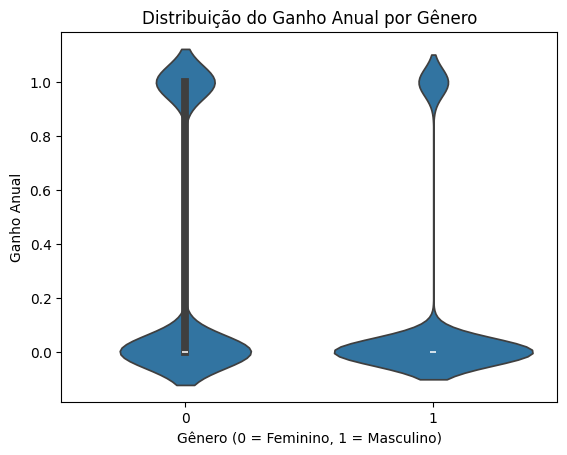

In [366]:
# Avaliação da correlação entre gênero e ganho anual  

correlacao_idade_educacao = data_numeric['renda'].corr(data_numeric['genero'])  
renda= data_numeric['renda']
genero= data_numeric['genero']
correlacao_idade_educacao 

sns.violinplot(x=genero, y=renda)
plt.title('Distribuição do Ganho Anual por Gênero')
plt.xlabel('Gênero (0 = Feminino, 1 = Masculino)')
plt.ylabel('Ganho Anual')
plt.show()

plt.show() 

### *RESULTADOS*
#### Como podemos analisar o genero feminino tem uma alta concentração de alta renda e baixa concentração de baixa renda, já o masculino possui valores opostos. Além disso graças a linha que se encontra no centro dos violinos, que é a mediana da renda, representa que o genero feminino possuí uma renda mais concentrada em relação com o genero masculino.

#### Conclui-se que a renda possuí valores desparelhos em relação com os dois generos, o que representa que os ganhos femininos são maiores do que o masculino.

Text(0, 0.5, 'Média da Renda')

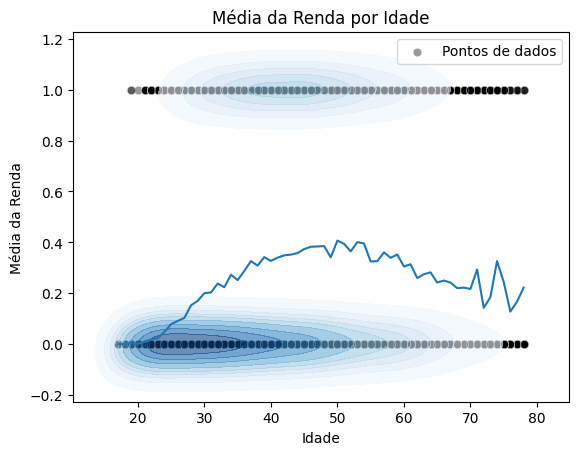

In [367]:
#Idade/salario 

idade = data_numeric['idade'] 
correlacao_idade_renda = idade.corr(data_numeric['renda']) 

# Gráfico que junta o tipo dispersão e densidade

sns.scatterplot(x=idade, y=data_numeric['renda'], alpha=0.4, color='black', label='Pontos de dados')
sns.kdeplot(x=idade, y=data_numeric['renda'], cmap="Blues", fill=True, alpha=0.6, label='Densidade')
plt.title(f'Correlação entre Idade e Ganho Anual (r = {correlacao_idade_renda:.2f})')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.legend()
#plt.show()

# Gráfico de linhas para visulizar a correlação entre idade e renda

mean_renda_por_idade = data_numeric.groupby('idade')['renda'].mean()
plt.plot(mean_renda_por_idade.index, mean_renda_por_idade.values)
plt.title('Média da Renda por Idade')
plt.xlabel('Idade')
plt.ylabel('Média da Renda')
#plt.show()

### *RESULTADO*
#### Podemos analisar apartir destes gráficos que há uma concentração maior de baixa renda entre 20 e 40 anos, porém a correlação entre idade e ganho é baixo, ou seja, com o aumento na idade, o crescimento do ganho é visivel porém é baixo. 

In [368]:
#Educação/idade 
correlacao_idade_educacao = data_numeric['idade'].corr(data_numeric['numero_educacional']) 
correlacao_idade_educacao 

np.float64(0.03172121704397517)

### *RESULTADO*
#### A correlação não é significativa, ou seja, não faz muita diferença a educação com a idade do indivíduo.

In [369]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_numeric[['idade', 'classe_trabalhadora', 'ocupacao', 'numero_educacional',
       'relacionamento_traduzido', 'raca', 'pais_natal', 'horas_por_semana', 'genero','renda']] = scaler.fit_transform(data_numeric[['idade', 'classe_trabalhadora', 'ocupacao', 'numero_educacional',
       'relacionamento_traduzido', 'raca', 'pais_natal', 'horas_por_semana', 'genero','renda']])
data_numeric

idade  classe_trabalhadora  ocupacao  numero_educacional  \
0      0.131148             0.833333  0.461538            0.400000   
1      0.344262             0.833333  0.076923            0.533333   
2      0.180328             0.666667  0.692308            0.733333   
3      0.442623             0.833333  0.461538            0.600000   
5      0.278689             0.833333  0.538462            0.333333   
...         ...                  ...       ...                 ...   
48833  0.426230             0.833333  1.000000            0.666667   
48834  0.245902             0.833333  0.846154            0.866667   
48835  0.590164             0.833333  0.230769            0.866667   
48837  0.163934             0.833333  0.846154            0.733333   
48841  0.573770             0.000000  0.230769            0.533333   

       relacionamento_traduzido  raca  pais_natal  horas_por_semana  renda  \
0                           0.2  0.50       0.950          0.446154    0.0   
1                           0.4  0.25       0.950          0.600000    0.0   
2                           0.4  0.25       0.950          0.446154    1.0   
3                           0.4  0.50       0.950          0.446154    1.0   
5                           0.6  0.25       0.950          0.292308    0.0   
...                         ...   ...         ...               ...    ...   
48833                       0.4  0.25       0.950          0.523077    0.0   
48834                       0.6  0.00       0.875          0.000000    0.0   
48835                       0.4  0.25       0.950          0.446154    1.0   
48837                       0.0  0.25       0.950          0.415385    0.0   
48841                       0.0  0.25       0.950          0.446154    1.0   

       genero  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
5         0.0  
...       ...  
48833     0.0  
48834     0.0  
48835     0.0  
48837     1.0  
48841     1.0  

[35636 rows x 10 columns]

# Modelagem do Algoritmo de Machine Learning

### Holdout KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [371]:
data.reset_index(inplace=True)

In [372]:
x_data = data_numeric[['idade', 'classe_trabalhadora', 'ocupacao', 'numero_educacional',
       'relacionamento_traduzido', 'raca', 'pais_natal', 'horas_por_semana', 'genero']]#definindo as características
y_data = data_numeric['renda']#definindo o atributo a ser classificado
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
model = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,7,10,15,20,25,30],
              'weights':['uniform','distance'],
             'p':[1,2]
}

grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10)
grid_search.fit(x_resampled,y_resampled)

print(grid_search.best_params_)

saida:{'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}

In [376]:
model = KNeighborsClassifier()
param_dist = {
    'n_neighbors': [1,5,10,20,25,30,40,50],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

# Melhor conjunto de hiperparâmetros
print(random_search.best_params_)

# 'weights': 'uniform', 'p': 1, 'n_neighbors': 50, 'algorithm': 'kd_tree'

In [378]:
knn = KNeighborsClassifier(weights ='uniform', p= 1, n_neighbors= 50, algorithm = 'kd_tree')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=50, p=1)

In [ ]:
y_pred_houldout = knn.predict(x_test)

acuracia = accuracy_score(y_test, y_pred_houldout)
acuracia

0.816107005892807

In [ ]:
report = classification_report(y_test, y_pred_houldout, output_dict=True)
df_report = pd.DataFrame(report)
df_report

0.0          1.0  accuracy     macro avg  weighted avg
precision     0.854196     0.656810  0.816107      0.755503      0.805952
recall        0.912355     0.518561  0.816107      0.715458      0.816107
f1-score      0.882318     0.579555  0.816107      0.730936      0.808319
support    8078.000000  2613.000000  0.816107  10691.000000  10691.000000

In [381]:
y_data.value_counts()

renda
0.0    26781
1.0     8855
Name: count, dtype: int64

<Axes: >

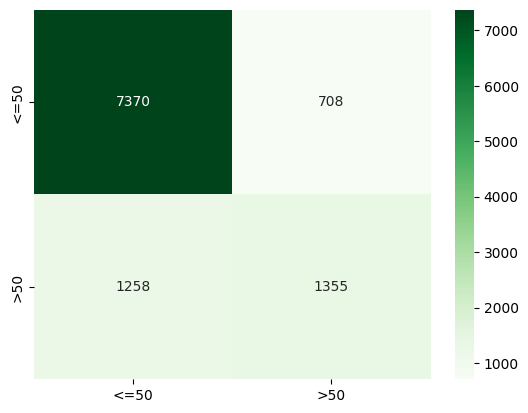

In [382]:
conf_matrix_houldout = confusion_matrix(y_test, y_pred_houldout)

lbl1_cross = ['<=50', '>50']
lbl2_cross = ['<=50', '>50']
sns.heatmap(conf_matrix_houldout, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

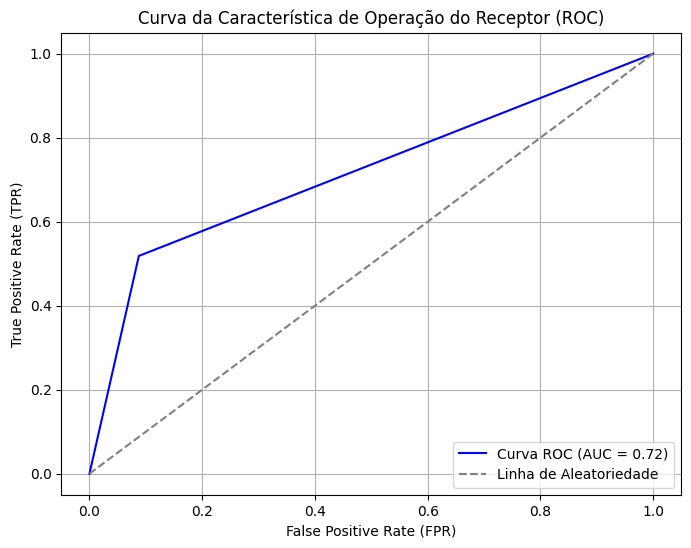

In [383]:
# Calcular os valores FPR, TPR e os thresholds
fp, tp, thresholds = roc_curve(y_test, y_pred_houldout)

# Calcular a AUC
roc_auc = auc(fp, tp)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fp, tp, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Linha de Aleatoriedade')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva da Característica de Operação do Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Holdout Decision Tree

In [384]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=10)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10)

In [385]:
clf_pred = clf.predict(x_test)
accuracy_score(y_test, clf_pred)

0.8045084650640726

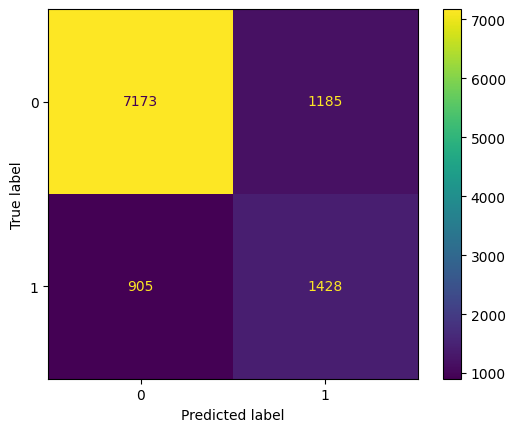

In [386]:
cf_clf = confusion_matrix(clf_pred, y_test)
ConfusionMatrixDisplay(cf_clf).plot()

In [387]:
report = classification_report(y_test, clf_pred, output_dict=True)
report_clf_df = pd.DataFrame(report)
report_clf_df

0.0          1.0  accuracy     macro avg  weighted avg
precision     0.858220     0.612087  0.804508      0.735154      0.798062
recall        0.887967     0.546498  0.804508      0.717233      0.804508
f1-score      0.872840     0.577436  0.804508      0.725138      0.800640
support    8078.000000  2613.000000  0.804508  10691.000000  10691.000000

### Holdout Random Forest

In [ ]:
model = RandomForestClassifier()
param_grid = {'n_estimators':[50,100,200],
              'max_depth':[None,10,20,50],
              'min_samples_split':[2,5,10]
}

grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

saida:{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

In [ ]:
model = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1,2,3,4,5],
    'criterion':['gini','entropy'],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

#815 minutos calculando e sem resultados ;-; 


In [391]:
model = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1,2,3,4,5],
    'criterion':['gini','entropy'],
    'max_features':['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

# Melhor conjunto de hiperparâmetros
print(random_search.best_params_)

c:\Users\lenox\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenox\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lenox\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\U

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


In [392]:
random = RandomForestClassifier(n_estimators= 500, min_samples_split= 10, min_samples_leaf= 2, max_features= 'log2', max_depth= 10, criterion= 'entropy')
random.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500)

In [393]:
random_pred = random.predict(x_test)
accuracy_score(y_test, random_pred)

0.8194743241979234

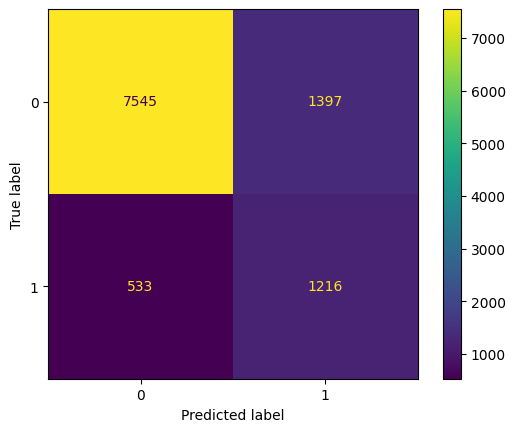

In [394]:
cf_random = confusion_matrix(random_pred, y_test)
ConfusionMatrixDisplay(cf_random).plot()

In [395]:
report = classification_report(y_test, random_pred, output_dict=True)
report_random_df = pd.DataFrame(report)
report_random_df

0.0          1.0  accuracy     macro avg  weighted avg
precision     0.843771     0.695254  0.819474      0.769513      0.807472
recall        0.934018     0.465365  0.819474      0.699692      0.819474
f1-score      0.886604     0.557542  0.819474      0.722073      0.806178
support    8078.000000  2613.000000  0.819474  10691.000000  10691.000000

## Cross Validation

In [396]:
random = RandomForestClassifier(n_estimators= 500, min_samples_split= 10, min_samples_leaf= 2, max_features= 'log2', max_depth= 10, criterion= 'entropy')

In [397]:
y_pred = cross_val_predict(random, x_data, y_data, cv=10)

In [398]:
matriz_confusao_crossvalidation = confusion_matrix(y_data, y_pred)     #A diagonal representa o que está correto
matriz_confusao_crossvalidation

array([[25006,  1775],
       [ 4563,  4292]])

In [ ]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(y_data, y_pred, output_dict=True)
df_report = pd.DataFrame(report)
df_report

0.0          1.0  accuracy     macro avg  weighted avg
precision      0.845683     0.707434  0.822146      0.776558      0.811330
recall         0.933722     0.484698  0.822146      0.709210      0.822146
f1-score       0.887524     0.575258  0.822146      0.731391      0.809931
support    26781.000000  8855.000000  0.822146  35636.000000  35636.000000

#### Random Undersampling

In [400]:
from sklearn.utils import resample

In [401]:
from sklearn.utils import resample

# Identificar as classes majoritária e minoritária
majority_class = y_data.value_counts().idxmax()
minority_class = y_data.value_counts().idxmin()

# Obter índices das classes
majority_indices = y_data[y_data == majority_class].index
minority_indices = y_data[y_data == minority_class].index

# Realizar undersampling na classe majoritária
undersampled_majority_indices = resample(
    majority_indices, 
    n_samples=len(minority_indices), 
    random_state=42
)

# Combinar os índices das classes
final_indices = undersampled_majority_indices.tolist() + minority_indices.tolist()

# Criar os novos datasets
undersampled_X_train = x_data.loc[final_indices]
undersampled_y_train = y_data.loc[final_indices]


In [402]:
y_pred = cross_val_predict(random, undersampled_X_train, undersampled_y_train, cv=10)

In [403]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(undersampled_y_train, y_pred, output_dict=True)     #Converte a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)    #Converte em um Dataframe para melhor visualização
df_report

0.0          1.0  accuracy     macro avg  weighted avg
precision     0.830024     0.772338  0.798419      0.801181      0.801181
recall        0.750536     0.846302  0.798419      0.798419      0.798419
f1-score      0.788281     0.807630  0.798419      0.797956      0.797956
support    8855.000000  8855.000000  0.798419  17710.000000  17710.000000

#### Random Overfitting (escolhido)

In [404]:
from sklearn.utils import resample

# Identificar as classes majoritária e minoritária
majority_class = y_data.value_counts().idxmax()
minority_class = y_data.value_counts().idxmin()

# Obter índices das classes
majority_indices = y_data[y_data == majority_class].index
minority_indices = y_data[y_data == minority_class].index

# Realizar oversampling na classe minoritária
oversampled_minority_indices = resample(
    minority_indices, 
    n_samples=len(majority_indices), 
    replace=True,  # Permitir repetição de amostras
    random_state=42
)

# Combinar os índices das duas classes
final_indices = majority_indices.tolist() + oversampled_minority_indices.tolist()

# Criar os novos datasets
oversampled_X_train = x_data.loc[final_indices]
oversampled_y_train = y_data.loc[final_indices]


In [405]:
y_pred = cross_val_predict(random, oversampled_X_train, oversampled_y_train, cv=10)

In [406]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(oversampled_y_train, y_pred, output_dict=True)     #Converte a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)    #Converte em um Dataframe para melhor visualização
df_report

0.0           1.0  accuracy    macro avg  weighted avg
precision      0.858897      0.781323   0.81541      0.82011       0.82011
recall         0.754826      0.875994   0.81541      0.81541       0.81541
f1-score       0.803506      0.825955   0.81541      0.81473       0.81473
support    26781.000000  26781.000000   0.81541  53562.00000   53562.00000

#### Adasyn - Modelo Escolido

In [407]:
from imblearn.over_sampling import ADASYN

In [408]:
# Assuming X_train and y_train are your feature and target arrays
adasyn = ADASYN(random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(x_data, y_data)

In [409]:
y_pred = cross_val_predict(random, x_resampled, y_resampled, cv=10)

<Axes: >

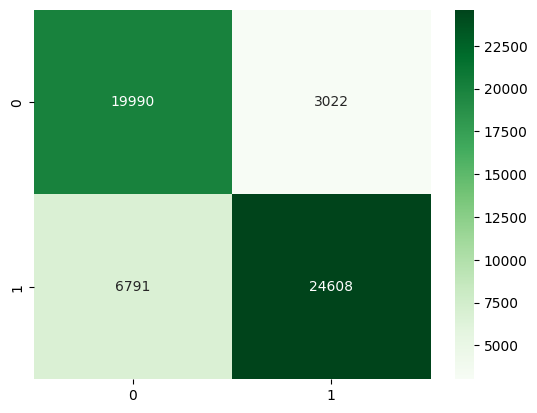

In [410]:
cf_matrix_cv = confusion_matrix(y_pred, y_resampled)
sns.heatmap(cf_matrix_cv,annot=True, fmt='d', cmap='Greens')

In [411]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(y_resampled, y_pred, output_dict=True)     #Converte a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)    #Converte em um Dataframe para melhor visualização
df_report

0.0           1.0  accuracy     macro avg  weighted avg
precision      0.868677      0.783719   0.81965      0.826198      0.825535
recall         0.746425      0.890626   0.81965      0.818525      0.819650
f1-score       0.802924      0.833760   0.81965      0.818342      0.818582
support    26781.000000  27630.000000   0.81965  54411.000000  54411.000000